In [ ]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

import string
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix
from sklearn import metrics

from time import time

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DATASET Full-Economic-News-DFE-839861.csv to DATASET Full-Economic-News-DFE-839861.csv


In [ ]:
import pandas as pd

# Replace with your filename
our_data= pd.read_csv('DATASET Full-Economic-News-DFE-839861.csv')

print(df.head())
print("Shape:", df.shape)
print("Columns:", df.columns)

    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  842613455    False   finalized                   3     12/5/15 17:48   
1  842613456    False   finalized                   3     12/5/15 16:54   
2  842613457    False   finalized                   3      12/5/15 1:59   
3  842613458    False   finalized                   3      12/5/15 2:19   
4  842613459    False   finalized                   3     12/5/15 17:48   

   positivity  positivity:confidence relevance  relevance:confidence  \
0         3.0                 0.6400       yes                 0.640   
1         NaN                    NaN        no                 1.000   
2         NaN                    NaN        no                 1.000   
3         NaN                 0.0000        no                 0.675   
4         3.0                 0.3257       yes                 0.640   

       articleid      date                                           headline  \
0  wsj_398217788   8/14/91         

In [ ]:
display(our_data.shape)
our_data["relevance"].value_counts()/our_data.shape[0]

(8000, 15)

,count
relevance,
no,0.821375
yes,0.177500
not sure,0.001125


In [ ]:
our_data = our_data[our_data.relevance != "not sure"]
our_data.shape
our_data['relevance'] = our_data.relevance.map({'yes':1, 'no':0})
our_data = our_data[["text","relevance"]]
our_data.shape

(7991, 2)

In [ ]:
stopwords = ENGLISH_STOP_WORDS
def clean(doc):
  doc = doc.replace("</br>"," ")
  doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
  doc = " ".join([token for token in doc.split() if token not in stopwords])

  return doc

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X = our_data.text
y = our_data.relevance
print(X.shape, y.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7991,) (7991,)
(5993,) (5993,)
(1998,) (1998,)


In [ ]:
vect = CountVectorizer(preprocessor=clean)
X_train_dtm = vect.fit_transform(X_train)

X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape,X_test_dtm.shape)

(5993, 49753) (1998, 49753)


In [ ]:
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

CPU times: user 10.3 ms, sys: 214 µs, total: 10.5 ms
Wall time: 35.8 ms


Accuracy:  0.7822822822822822
ROC_AOC_Score:  0.7251117679464362


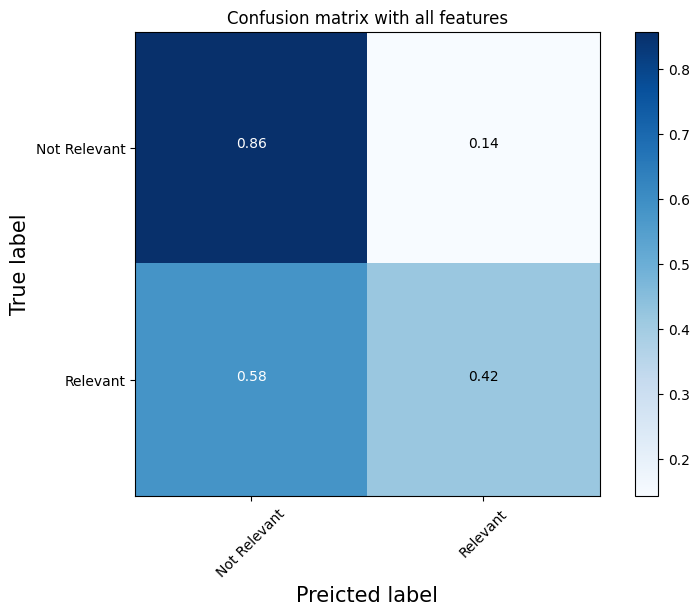

In [ ]:
import itertools
from sklearn.metrics import roc_auc_score
def plot_confusion_matrix(cm, classes,normalize = False,title = 'Confusion matrix',cmap = plt.cm.Blues):
  if normalize:
    cm  = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation = 45)
  plt.yticks(tick_marks,classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment="center",color="white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=15)
  plt.xlabel('Predicted label',fontsize=15)

print("Accuracy: ",accuracy_score(y_test,y_pred_class))

cnf_matrix = confusion_matrix(y_test,y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,title = 'Confusion matrix with all features')

y_pred_prob = nb.predict_proba(X_test_dtm)[:,1]
print("ROC_AOC_Score: ", roc_auc_score(y_test,y_pred_prob))

In [ ]:
# Naive Bayes Evaluation
y_pred_class = nb.predict(X_test_dtm)

print("Naive Bayes Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred_class))
print("Precision:", precision_score(y_test, y_pred_class))
print("Recall   :", recall_score(y_test, y_pred_class))
print("F1-score :", f1_score(y_test, y_pred_class))

Naive Bayes Performance:
Accuracy : 0.7822822822822822
Precision: 0.37730870712401055
Recall   : 0.41812865497076024
F1-score : 0.39667128987517336


CPU times: user 6.26 ms, sys: 0 ns, total: 6.26 ms
Wall time: 6.3 ms
Accuracy:  0.6876876876876877


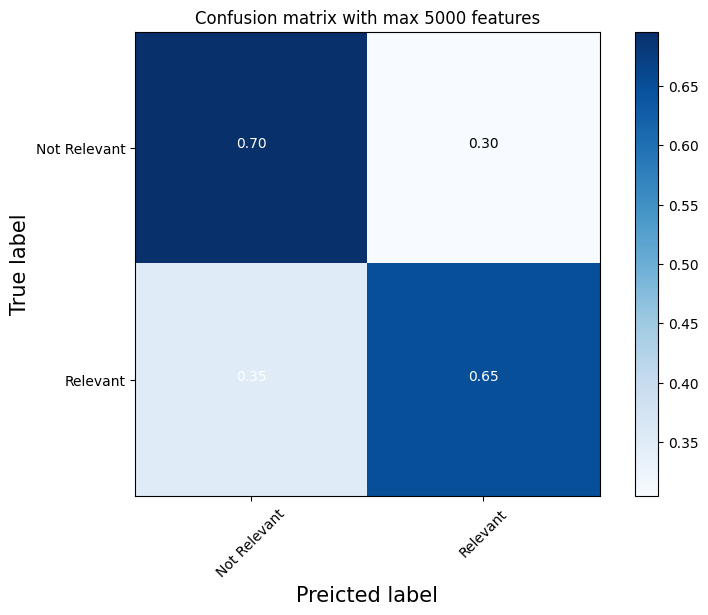

In [ ]:
vect = CountVectorizer(preprocessor = clean,max_features=5000)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
%time nb.fit(X_train_dtm,y_train)
y_pred_class = nb.predict(X_test_dtm)
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred_class))

cnf_matrix = confusion_matrix(y_test,y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix,classes = ['Not Relevant','Relevant'],normalize=True, title = 'Confusion matrix with max 5000 features')


Accuracy:  0.7357357357357357
AUC:  0.7251117679464362


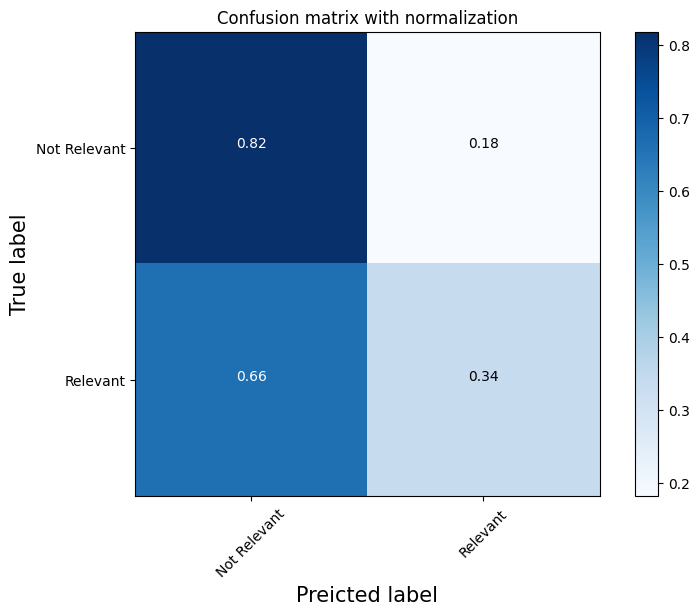

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train_dtm,y_train)

y_pred_class = logreg.predict(X_test_dtm)

print("Accuracy: ",accuracy_score(y_test,y_pred_class))
print("AUC: ",roc_auc_score(y_test,y_pred_prob))
cnf_matrix = confusion_matrix(y_test,y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True, title='Confusion matrix with normalization')

In [ ]:
# Logistic Regression Evaluation
y_pred_class = logreg.predict(X_test_dtm)

print("\nLogistic Regression Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred_class))
print("Precision:", precision_score(y_test, y_pred_class))
print("Recall   :", recall_score(y_test, y_pred_class))
print("F1-score :", f1_score(y_test, y_pred_class))


Logistic Regression Performance:
Accuracy : 0.7357357357357357
Precision: 0.2764423076923077
Recall   : 0.3362573099415205
F1-score : 0.3034300791556728


Accuracy:  0.6836836836836837
AUC:  0.7251117679464362


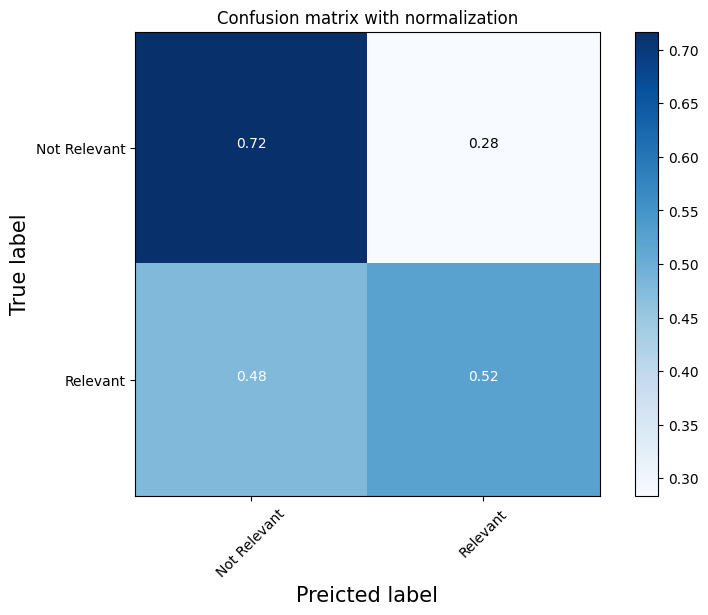

In [ ]:
from sklearn.svm import LinearSVC

vect = CountVectorizer(preprocessor = clean, max_features=1000)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

classifier = LinearSVC(class_weight='balanced')
classifier.fit(X_train_dtm,y_train)

y_pred_class = classifier.predict(X_test_dtm)

print("Accuracy: ",accuracy_score(y_test,y_pred_class))
print("AUC: ",roc_auc_score(y_test,y_pred_prob))
cnf_matrix = confusion_matrix(y_test,y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize = True,title='Confusion matrix with normalization')



In [ ]:
# SVM Evaluation
y_pred_class = classifier.predict(X_test_dtm)

print("\nSVM Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred_class))
print("Precision:", precision_score(y_test, y_pred_class))
print("Recall   :", recall_score(y_test, y_pred_class))
print("F1-score :", f1_score(y_test, y_pred_class))


SVM Performance:
Accuracy : 0.6836836836836837
Precision: 0.2762345679012346
Recall   : 0.5233918128654971
F1-score : 0.3616161616161616
